## Observations and Insights 

Insights 


In [1]:
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
num_mice=len(mouse_data_df['Mouse ID'].unique())
print(num_mice)

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep =False)
duplicate_mouse_df = mouse_data_df[duplicate_mice]
duplicate_mouse = duplicate_mouse_df['Mouse ID'].unique()
duplicate_mouse_ID = duplicate_mouse[0]
print(duplicate_mouse_ID)

g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = mouse_data_df[duplicate_mice]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_data_df[mouse_data_df['Mouse ID' ]!= duplicate_mouse_ID]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = len(clean_df['Mouse ID'].unique())
print(num_mice_clean)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

#make dataframe of drug regimen and Tumor volume
summary_df = pd.DataFrame({'Drug Regimen': clean_df['Drug Regimen'], 'Tumor Volume Mean': clean_df['Tumor Volume (mm3)']})
#set regimen to index
summary_df = summary_df.set_index('Drug Regimen')

#calculate mean, median, variance, stdev, and sem of tumor volume and groupy regimen
drug_sum_df = summary_df.groupby('Drug Regimen').mean()
drug_sum_df['Tumor Volume Meadian'] = summary_df.groupby('Drug Regimen').median()
drug_sum_df['Tumor Volume Variance'] = summary_df.groupby('Drug Regimen').var()
drug_sum_df['Tumor Volume StDev'] = summary_df.groupby('Drug Regimen').std()
drug_sum_df['Tumor Volume SEM'] = summary_df.groupby('Drug Regimen').sem()


#summary_df
drug_sum_df

,Tumor Volume Mean,Tumor Volume Meadian,Tumor Volume Variance,Tumor Volume StDev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

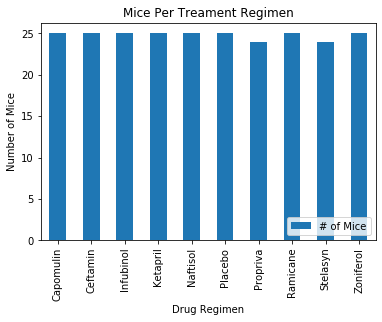

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
#filter count mouse ID once rather than for each timepoint
filter_mice =clean_df['Timepoint'] == 0
filt_clean_df=clean_df[filter_mice]

mice_per_reg=pd.DataFrame({'Drug Regimen': filt_clean_df['Drug Regimen'], '# of Mice': filt_clean_df['Mouse ID']})
mice_per_reg=mice_per_reg.groupby('Drug Regimen').count()
mice_per_reg.plot(kind='bar', title='Mice Per Treament Regimen')
plt.ylabel('Number of Mice')
plt.legend(loc=4)
plt.show()



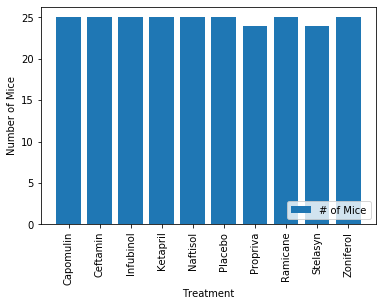

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drugs = list(clean_df['Drug Regimen'].sort_values().unique())
num_mice = list(mice_per_reg['# of Mice'])
x_axis=np.arange(len(num_mice))
plt.bar(x_axis, num_mice, align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs, rotation='vertical')
plt.xlabel('Treatment')
plt.ylabel('Number of Mice')
plt.legend(['# of Mice'], loc=4)
plt.show()

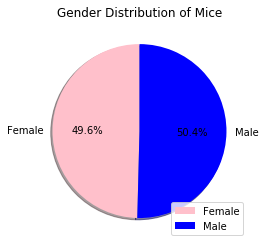

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#make df with only Mouse ID and sex 
mouse_gender_df = filt_clean_df.drop(['Drug Regimen', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], axis=1)
#groupby sex then count 
mouse_gender_count = mouse_gender_df.groupby('Sex').count()
#generate plot
mouse_gender_count.plot(kind='pie', y='Mouse ID', title='Gender Distribution of Mice', autopct="%1.1f%%", shadow=True, colors=['pink', 'blue'], startangle=90)
plt.ylabel('')
plt.legend(loc=4)
plt.show()

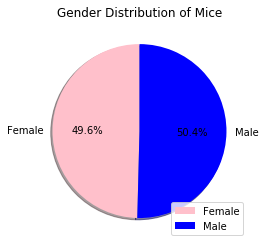

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouse_gender_count['Mouse ID'], autopct="%1.1f%%", shadow=True, colors=['pink', 'blue'], labels=list(mouse_gender_df['Sex'].sort_values().unique()), startangle=90)
plt.title('Gender Distribution of Mice')
plt.legend(loc=4)
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# list all drugs to filter
drug_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#filter df by drugs in list
treatment_filter = clean_df['Drug Regimen'].isin(drug_list)
treatment_df = clean_df[treatment_filter]
#groupby mouse ID to get single mice and find max timepoint
treatment_max_time = treatment_df.groupby('Mouse ID').max()['Timepoint']
max_time_treatment_df = pd.DataFrame(treatment_max_time)
max_time_treatment_df = pd.merge(max_time_treatment_df, clean_df, on=("Mouse ID","Timepoint"),how="left")

#filter each df so I get single df for each drug type 

max_time_capomulin = max_time_treatment_df[max_time_treatment_df['Drug Regimen']=='Capomulin']
max_time_capomulin=max_time_capomulin.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
max_time_ramicane = max_time_treatment_df[max_time_treatment_df['Drug Regimen']=='Ramicane']
max_time_ramicane=max_time_ramicane.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
max_time_infubinol = max_time_treatment_df[max_time_treatment_df['Drug Regimen']=='Infubinol']
max_time_infubinol=max_time_infubinol.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})
max_time_ceftamin = max_time_treatment_df[max_time_treatment_df['Drug Regimen']=='Ceftamin']
max_time_ceftamin=max_time_ceftamin.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'})

In [47]:
max_time_capomulin.sort_values(by=['Mouse ID'])

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
9,b128,45,Capomulin,Female,9,22,38.982878,2
12,b742,45,Capomulin,Male,7,21,38.939633,0
24,f966,20,Capomulin,Male,16,17,30.485985,0
25,g288,45,Capomulin,Male,3,19,37.074024,1
26,g316,45,Capomulin,Female,22,22,40.159220,2
32,i557,45,Capomulin,Female,1,24,47.685963,1
33,i738,45,Capomulin,Female,23,20,37.311846,2
34,j119,45,Capomulin,Female,7,23,38.125164,1
35,j246,35,Capomulin,Female,21,21,38.753265,1
45,l509,45,Capomulin,Male,17,21,41.483008,3


In [48]:
max_time_ramicane.sort_values(by=['Mouse ID'])

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
5,a520,45,Ramicane,Male,13,21,38.810366,1
7,a644,45,Ramicane,Female,7,17,32.978522,1
16,c458,30,Ramicane,Female,23,20,38.342008,2
17,c758,45,Ramicane,Male,9,17,33.397653,1
19,d251,45,Ramicane,Female,8,19,37.311236,2
21,e662,45,Ramicane,Male,8,24,40.659006,2
27,g791,45,Ramicane,Male,11,16,29.128472,1
29,i177,45,Ramicane,Male,10,18,33.562402,3


In [49]:
max_time_infubinol.sort_values(by=['Mouse ID'])

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
6,a577,30,Infubinol,Female,6,25,57.031862,2
8,a685,45,Infubinol,Male,8,30,66.083066,3
14,c139,45,Infubinol,Male,11,28,72.226731,2
15,c326,5,Infubinol,Female,18,25,36.321346,0
18,c895,30,Infubinol,Female,7,29,60.969711,2
20,e476,45,Infubinol,Male,23,26,62.435404,1
22,f345,45,Infubinol,Male,23,26,60.918767,1
31,i386,40,Infubinol,Female,23,29,67.289621,4


In [50]:
max_time_ceftamin.sort_values(by=['Mouse ID'])

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3),Metastatic Sites
2,a275,45,Ceftamin,Female,20,28,62.999356,3
10,b447,0,Ceftamin,Male,2,30,45.000000,0
11,b487,25,Ceftamin,Female,6,28,56.057749,1
13,b759,30,Ceftamin,Female,12,25,55.742829,1
23,f436,15,Ceftamin,Female,3,25,48.722078,2
28,h531,5,Ceftamin,Male,5,27,47.784682,0
36,j296,45,Ceftamin,Female,24,30,61.849023,3
39,k210,45,Ceftamin,Male,15,28,68.923185,3
43,l471,45,Ceftamin,Female,7,28,67.748662,1
44,l490,30,Ceftamin,Male,24,26,57.918381,3


In [58]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_df_dict={'capomulin': max_time_capomulin, 'ceftamin': max_time_ceftamin, 'infubimol': max_time_infubinol, 'ramicane': max_time_ramicane}
for key, value in drug_df_dict.items():
    #print header
    print('-'*60)
    drug_name = key
    print(f"Data for: {drug_name}")
    print('-'*60)
    print('')
    #get the quartiles
    quartiles=value['Final Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    #calculat interquartile range
    iqr = upperq-lowerq
    print(f"The lower quartile of the final tumor volume is {lowerq}")
    print(f"The upper quartileof the final tumor volume is {upperq}")
    print(f"The IQR of the final tumor volume is {iqr}")
    #find the bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    #filter by upper bound. Lower bound is impossible so no lower bound outliers
    outliers = value['Final Tumor Volume (mm3)'] > upper_bound
    outlier_df = value[outliers]
    if len(outlier_df) ==0:
        print("There are no outliers in data set")
    else:
        for element in outlier_df['Mouse ID'].tolist():
            print(f"There are {len(outlier_df['Mouse ID'].tolist())} outliers in this drug study")
            print(f"{element} is an outlier")
    print('-'*60)

------------------------------------------------------------
Data for: capomulin
------------------------------------------------------------

The lower quartile of the final tumor volume is 32.37735684
The upper quartileof the final tumor volume is 40.1592203
The IQR of the final tumor volume is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
There are no outliers in data set
------------------------------------------------------------
------------------------------------------------------------
Data for: ceftamin
------------------------------------------------------------

The lower quartile of the final tumor volume is 48.72207785
The upper quartileof the final tumor volume is 64.29983003
The IQR of the final tumor volume is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
There are no outliers in data set
-------------------------------------------

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest



## Line and Scatter Plots

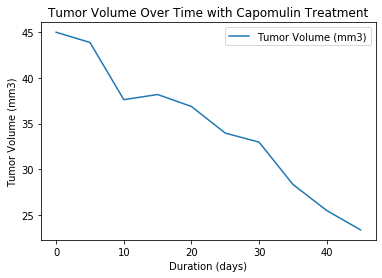

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#filter df for capomulin
filter_drug = clean_df['Drug Regimen'] == 'Capomulin'
filter_drug_capo = clean_df[filter_drug]
#filter df for one mouse–s185
filter_drug_mouse = filter_drug_capo['Mouse ID'] == 's185'
filter_drug_df = filter_drug_capo[filter_drug_mouse]
#Plot line graph
filter_drug_df.plot.line(x='Timepoint', y='Tumor Volume (mm3)', title='Tumor Volume Over Time with Capomulin Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Duration (days)')
plt.show()
filter_drug_df

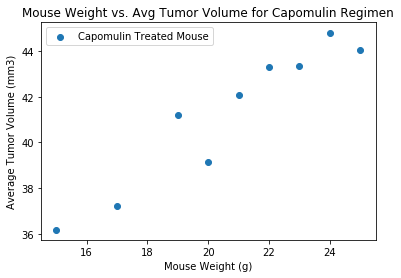

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#groupby weight and get the avereages 
filter_drug_capo = filter_drug_capo.groupby('Weight (g)').mean()
#plot scatter 
plt.scatter(filter_drug_capo.index, filter_drug_capo['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Avg Tumor Volume for Capomulin Regimen')
plt.legend(['Capomulin Treated Mouse'], loc=2)
plt.show()

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.95


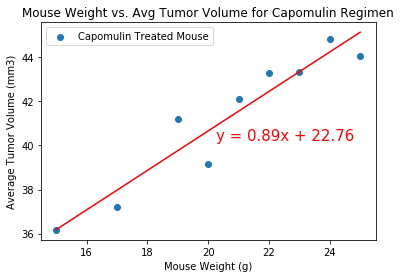

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#plot scatter 
plt.scatter(filter_drug_capo.index, filter_drug_capo['Tumor Volume (mm3)'])
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Avg Tumor Volume for Capomulin Regimen')
plt.legend(['Capomulin Treated Mouse'], loc=2)

#calculate correlation
correlation = st.pearsonr(filter_drug_capo.index, filter_drug_capo['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
#add regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(filter_drug_capo.index, filter_drug_capo['Tumor Volume (mm3)'])
#graph regression line
regress_values = filter_drug_capo.index * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(filter_drug_capo.index,regress_values,"r-")
plt.annotate(line_eq, (20.25,40.25), fontsize=15,color="red")
plt.show()